<a href="https://colab.research.google.com/github/ShubhDixit20/Sagemaker_test/blob/main/Model_development_notebook_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
os.getcwd()

'/content/drive/MyDrive'

In [6]:
csv_path = os.path.join('T_out1.csv')
csv_path

'T_out1.csv'

In [7]:
data = pd.read_csv(csv_path)
data

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
77115       109  1691476158  0.94  9.06 -0.94
77116       109  1691476158  1.41  9.06 -0.62
77117       109  1691476158  1.25  9.22 -0.94
77118       109  1691476158  1.25  9.53 -1.41
77119       109  1691476158  0.78  9.69 -0.94

[77120 rows x 5 columns]

In [8]:
copied_data = data.copy()
copied_data

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
77115       109  1691476158  0.94  9.06 -0.94
77116       109  1691476158  1.41  9.06 -0.62
77117       109  1691476158  1.25  9.22 -0.94
77118       109  1691476158  1.25  9.53 -1.41
77119       109  1691476158  0.78  9.69 -0.94

[77120 rows x 5 columns]

In [9]:
data.dtypes

deviceId       int64
timestamp      int64
AccX         float64
AccY         float64
AccZ         float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77120 entries, 0 to 77119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deviceId   77120 non-null  int64  
 1   timestamp  77120 non-null  int64  
 2   AccX       77120 non-null  float64
 3   AccY       77120 non-null  float64
 4   AccZ       77120 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.9 MB


In [11]:
data.head()

deviceId   timestamp  AccX  AccY  AccZ
0       109  1691408812  1.56 -9.53 -1.56
1       109  1691408812  1.72 -9.22 -1.56
2       109  1691408812  1.72 -9.38 -1.09
3       109  1691408812  1.72 -9.38 -1.88
4       109  1691408812  1.41 -9.69 -1.88

In [12]:
data.describe()

deviceId     timestamp          AccX          AccY          AccZ
count   77120.0  7.712000e+04  77120.000000  77120.000000  77120.000000
mean      109.0  1.691443e+09      0.564512      7.481783     -2.031782
std         0.0  1.949027e+04      2.705590      4.609254      1.762000
min       109.0  1.691409e+09    -19.530000    -13.120000    -19.530000
25%       109.0  1.691427e+09     -0.470000      8.440000     -2.340000
50%       109.0  1.691443e+09      1.250000      9.060000     -1.720000
75%       109.0  1.691460e+09      2.500000      9.380000     -1.250000
max       109.0  1.691476e+09     19.530000     19.530000     19.530000

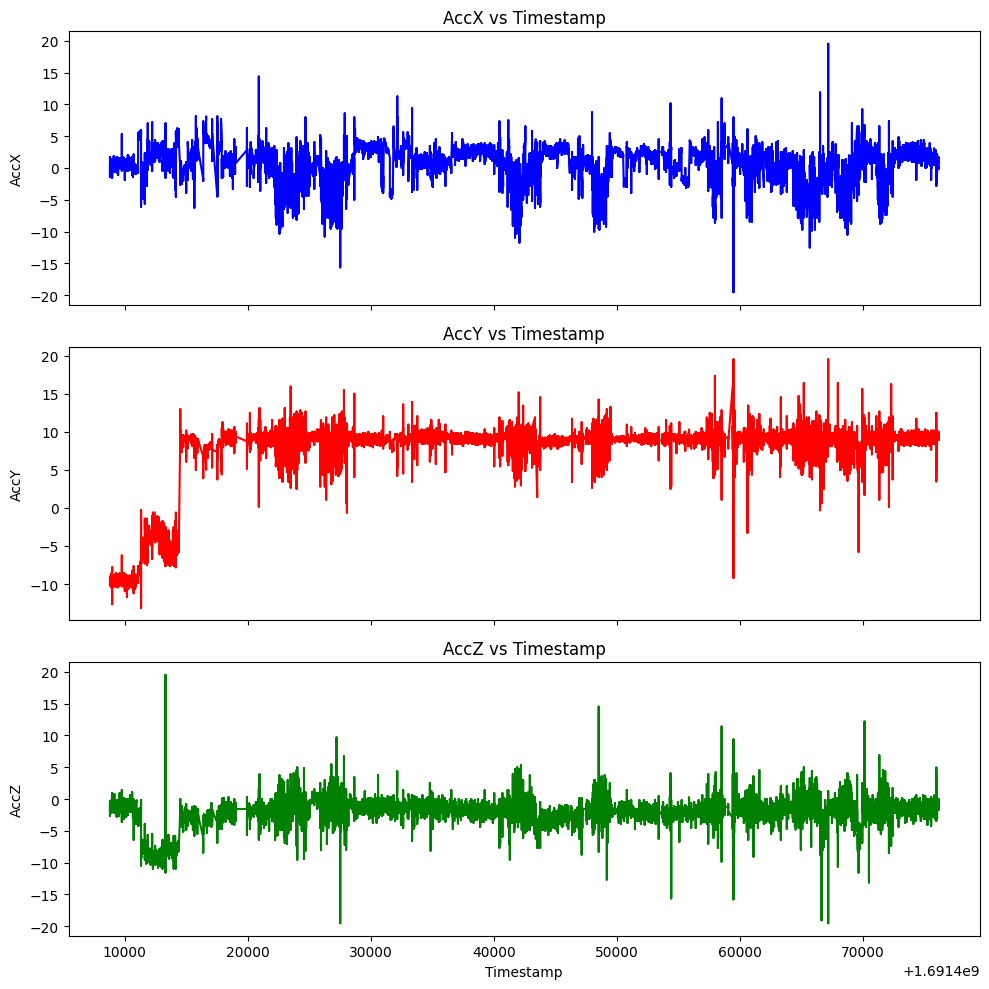

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10,10), sharex=True)

axs[0].plot(data['timestamp'], data['AccX'], color='blue')
axs[0].set_title('AccX vs Timestamp')
axs[0].set_ylabel('AccX')

axs[1].plot(data['timestamp'], data['AccY'], color='red')
axs[1].set_title('AccY vs Timestamp')
axs[1].set_ylabel('AccY')

axs[2].plot(data['timestamp'], data['AccZ'], color='green')
axs[2].set_title('AccZ vs Timestamp')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('AccZ')

fig.tight_layout()

plt.show()

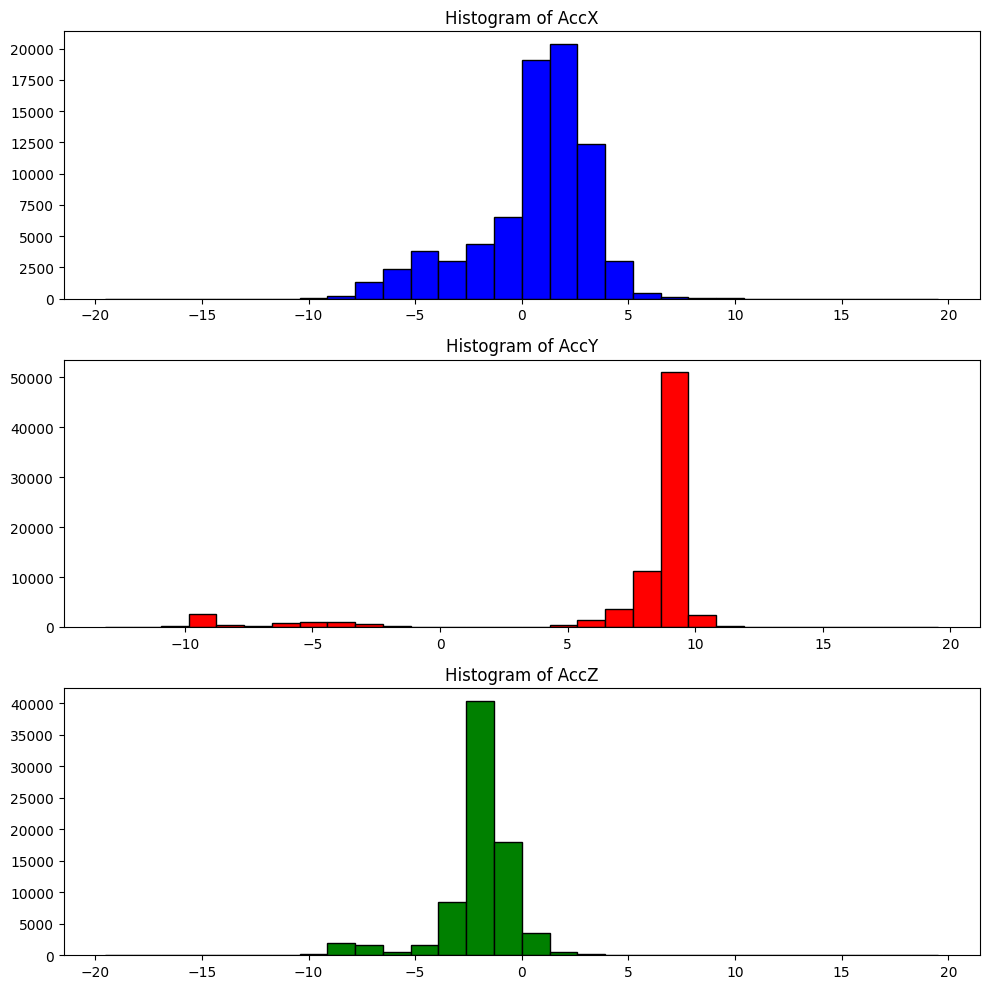

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

axs[0].hist(data['AccX'], bins=30, color='blue', edgecolor='black')
axs[0].set_title('Histogram of AccX')

axs[1].hist(data['AccY'], bins=30, color='red', edgecolor='black')
axs[1].set_title('Histogram of AccY')

axs[2].hist(data['AccZ'], bins=30, color='green', edgecolor='black')
axs[2].set_title('Histogram of AccZ')

fig.tight_layout()

plt.show()


In [16]:
correlation = data[['AccX', 'AccY', 'AccZ']].corr()
correlation

AccX      AccY      AccZ
AccX  1.000000 -0.008664 -0.250252
AccY -0.008664  1.000000  0.437211
AccZ -0.250252  0.437211  1.000000

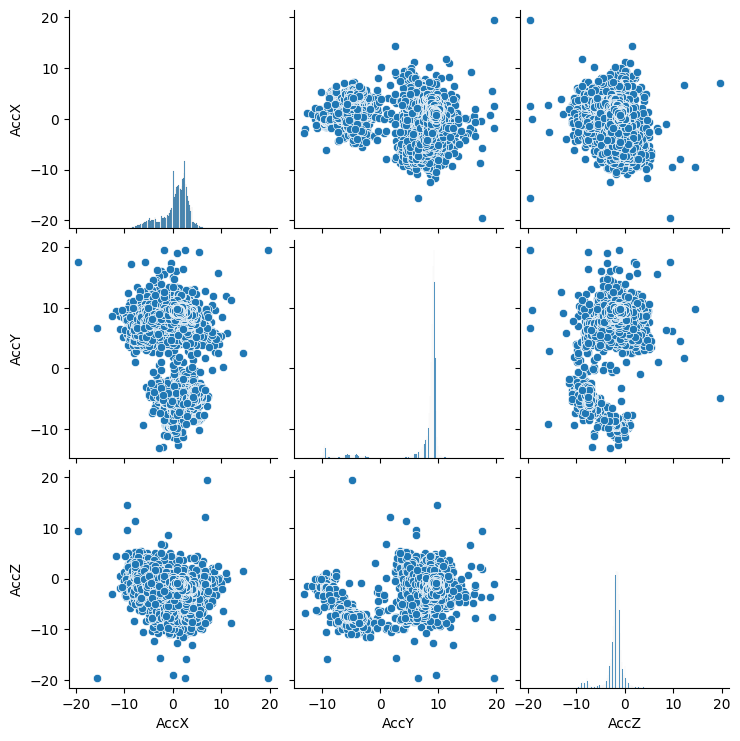

In [17]:
sns.pairplot(data[['AccX', 'AccY', 'AccZ']])
plt.show()

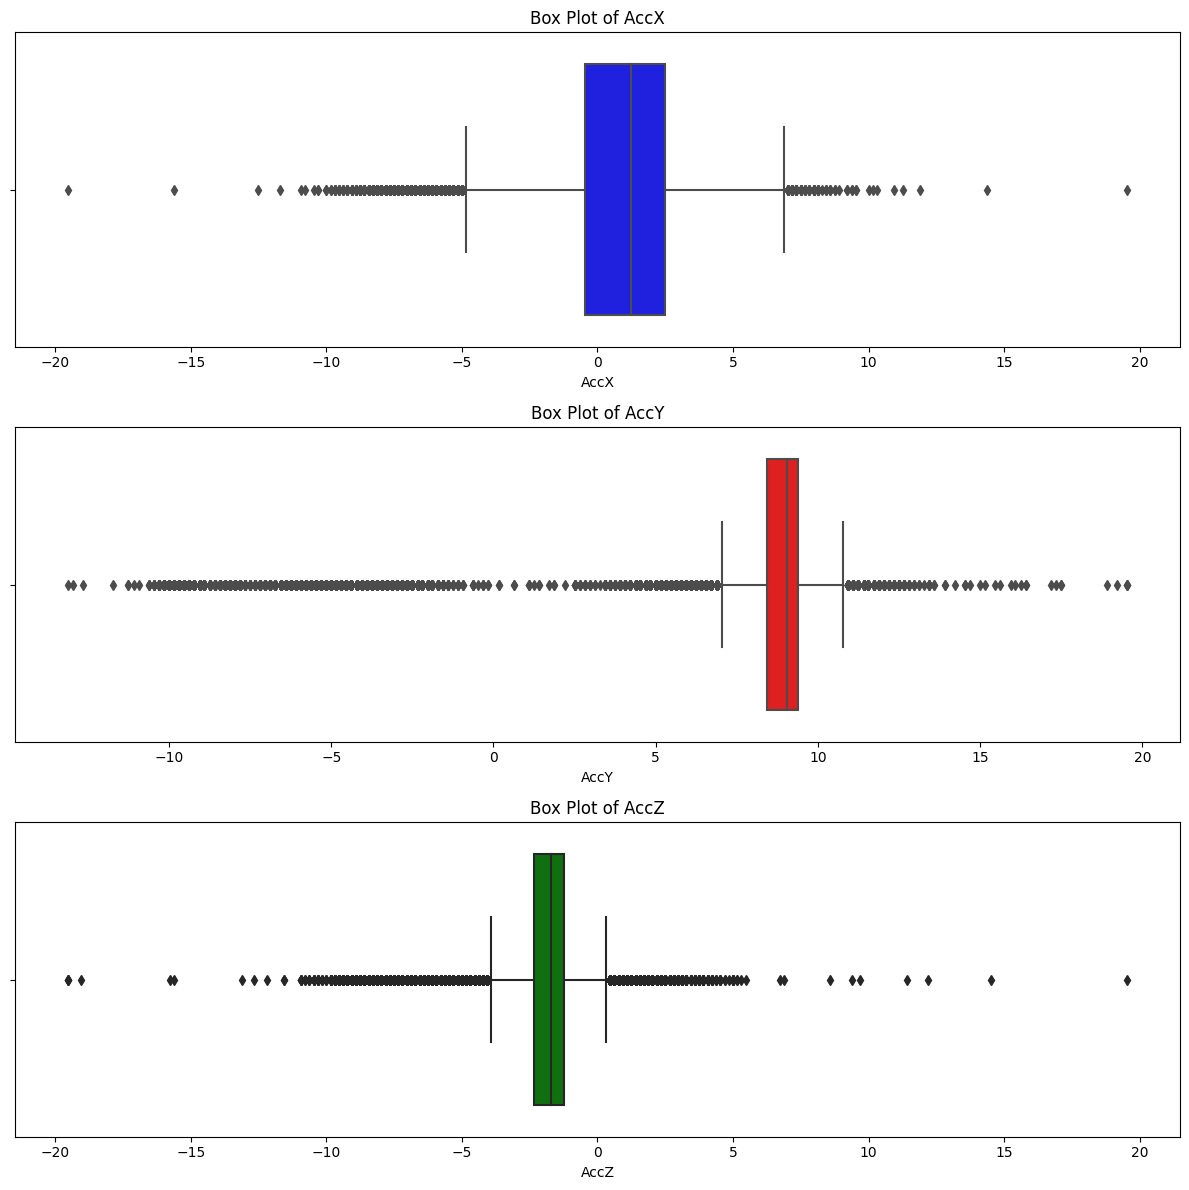

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

sns.boxplot(x=data['AccX'], ax=axs[0], color='blue')
axs[0].set_title('Box Plot of AccX')

sns.boxplot(x=data['AccY'], ax=axs[1], color='red')
axs[1].set_title('Box Plot of AccY')

sns.boxplot(x=data['AccZ'], ax=axs[2], color='green')
axs[2].set_title('Box Plot of AccZ')

fig.tight_layout()

plt.show()


In [19]:
# plt.plot(data['timestamp'], data['AccX'], marker='o', linestyle='-', color='b', label='X')
# plt.plot(data['timestamp'], data['AccY'], marker='o', linestyle='-', color='r', label='Y')
# plt.plot(data['timestamp'], data['AccZ'], marker='o', linestyle='-', color='g', label='Z')

# plt.legend()
# plt.show()

### Feature extraction

In [20]:
SAMPLING_RATE = 79
WINDOW_SIZE = 4
STEP_SIZE = 1

In [21]:
window_length = SAMPLING_RATE * WINDOW_SIZE
step_length = SAMPLING_RATE * STEP_SIZE

In [22]:
window_length, step_length

(316, 79)

In [23]:
data_selected = data[['AccX', 'AccY', 'AccZ']]
data_selected

AccX  AccY  AccZ
0      1.56 -9.53 -1.56
1      1.72 -9.22 -1.56
2      1.72 -9.38 -1.09
3      1.72 -9.38 -1.88
4      1.41 -9.69 -1.88
...     ...   ...   ...
77115  0.94  9.06 -0.94
77116  1.41  9.06 -0.62
77117  1.25  9.22 -0.94
77118  1.25  9.53 -1.41
77119  0.78  9.69 -0.94

[77120 rows x 3 columns]

In [24]:
from tqdm import tqdm

In [25]:
def feature_extraction(df,
                       step_length,
                       window_length):
    """_summary_

    Parameters
    ----------
    data_formatted : pd.DataFrame
        _description_
    step_length : int
        _description_
    window_length : int
        _description_
    features_list : list
        _description_

    Returns
    -------
    _type_
        _description_
    """

    features_df = pd.DataFrame()

    # data_formatted = remove_rows_containing_null_values(df)
    # data_formatted = df_nan_treated.drop(["TimeStamp_JST"], axis=1)

    # labels = data_selected['Label']
    range_end = len(df) - window_length

    features_list = ["Time Stamp",
                     # 'cow_identifier',
                    #  'label',
                     'AccX', 'AccY', 'AccZ',
                     'AccX_kurt', 'AccY_kurt', 'AccZ_kurt',
                     'AccX_mean', 'AccY_mean', 'AccZ_mean',
                     'AccX_median', 'AccY_median', 'AccZ_median',
                     'AccX_min', 'AccY_min', 'AccZ_min',
                     'AccX_max', 'AccY_max', 'AccZ_max',
                     'AccX_quan_25', 'AccY_quan_25', 'AccZ_quan_25',
                     'AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50',
                     'AccX_quan_75', 'AccY_quan_75', 'AccZ_quan_75',
                     'AccX_skew', 'AccY_skew', 'AccZ_skew',
                     'AccX_sum', 'AccY_sum', 'AccZ_sum',
                     'AccX_std', 'AccY_std', 'AccZ_std',
                     'AccX_var', 'AccY_var', 'AccZ_var',
                     'SignalMagnitudeArea',
                     'VectorMagnitude',
                     'MovementVariation',
                     'Energy',
                     'Entropy']


    for i in tqdm(range(0, range_end, step_length)):

        timestamp_list = df[['timestamp']][i: i + window_length]
        timestamp_max = timestamp_list.max()

        data_feature = data_selected[['AccX', 'AccY', 'AccZ']][i: i + window_length]

        # features
        data_kurt = data_feature.kurtosis()

        data_mean = data_feature.mean()

        data_median = data_feature.median()

        data_min = data_feature.min()

        data_max = data_feature.max()

        data_quan_25 = data_feature.quantile(q=0.25)

        data_quan_50 = data_feature.quantile(q=0.5)
        # print("data_50:",data_quan_50)

        data_quan_75 = data_feature.quantile(q=0.75)
        # print("data_75:",data_quan_75)

        data_skew = data_feature.skew()
        # print("data_skew: ",data_skew)

        data_sum = data_feature.sum()
        # print("data_sum:",data_sum)

        data_std = data_feature.std()
        # print("data_std:",data_std)

        data_var = data_feature.var()
        # print("data_var:",data_var)

        SignalMagnitudeArea = abs(data_selected.loc[i][0]) + abs(data_selected.loc[i][1]) + abs(data_selected.loc[i][2])

        VectorMagnitude = np.sqrt(abs(data_selected.loc[i][0] + data_selected.loc[i][1] + data_selected.loc[i][2]))

        MovementVariation = abs(data_selected.loc[i+1][0]-data_selected.loc[i][0]) + abs(data_selected.loc[i+1][1]-data_selected.loc[i][1]) + abs(data_selected.loc[i+1][2]-data_selected.loc[i][2])

        Energy = ((data_selected.loc[i][0])**2 + (data_selected.loc[i][1])**2 + (data_selected.loc[i][2])**2)**2

        Entropy = (1+(data_selected.loc[i][0] + data_selected.loc[i][1] + data_selected.loc[i][2]))**2 * np.log(abs(1+data_selected.loc[i][0] + data_selected.loc[i][1] + (data_selected.loc[i][2])**2))

        data_combined_hor = pd.concat([pd.Series(timestamp_max[0]),
                                    #    pd.Series(labels.loc[i]),

                                       pd.Series(data_feature.loc[i][0]),
                                       pd.Series(data_feature.loc[i][1]),
                                       pd.Series(data_feature.loc[i][2]),

                                       pd.Series(data_kurt[0]),
                                       pd.Series(data_kurt[1]),
                                       pd.Series(data_kurt[2]),

                                       pd.Series(data_mean[0]),
                                       pd.Series(data_mean[1]),
                                       pd.Series(data_mean[2]),

                                       pd.Series(data_median[0]),
                                       pd.Series(data_median[1]),
                                       pd.Series(data_median[2]),

                                       pd.Series(data_min[0]),
                                       pd.Series(data_min[1]),
                                       pd.Series(data_min[2]),

                                       pd.Series(data_max[0]),
                                       pd.Series(data_max[1]),
                                       pd.Series(data_max[2]),

                                       pd.Series(data_quan_25[0]),
                                       pd.Series(data_quan_25[1]),
                                       pd.Series(data_quan_25[2]),

                                       pd.Series(data_quan_50[0]),
                                       pd.Series(data_quan_50[1]),
                                       pd.Series(data_quan_50[2]),

                                       pd.Series(data_quan_75[0]),
                                       pd.Series(data_quan_75[1]),
                                       pd.Series(data_quan_75[2]),

                                       pd.Series(data_skew[0]),
                                       pd.Series(data_skew[1]),
                                       pd.Series(data_skew[2]),

                                       pd.Series(data_sum[0]),
                                       pd.Series(data_sum[1]),
                                       pd.Series(data_sum[2]),

                                       pd.Series(data_std[0]),
                                       pd.Series(data_std[1]),
                                       pd.Series(data_std[2]),

                                       pd.DataFrame(data_var[0:]).transpose(),

                                       pd.Series(SignalMagnitudeArea),
                                       pd.Series(VectorMagnitude),
                                       pd.Series(MovementVariation),
                                       pd.Series(Energy),
                                       pd.Series(Entropy)],

                                      axis=1,
                                      ignore_index=True)

        features_df = pd.concat([features_df,
                                data_combined_hor], ignore_index=True,
                                axis=0)


    features_df.columns = features_list

    features_df.dropna()

    # Saving Dataframe
    features_df.to_csv("cleaned_train_dataframe.csv", index=False)

    return features_df


In [26]:
features = feature_extraction(data,
                              step_length=step_length,
                              window_length = window_length)

100%|██████████| 973/973 [00:27<00:00, 35.68it/s]


In [27]:
features

Time Stamp  AccX   AccY  AccZ  AccX_kurt  AccY_kurt  AccZ_kurt  \
0    1691408993  1.56  -9.53 -1.56   0.369773  21.096188   0.570473   
1    1691409053  0.62 -10.16 -1.09   0.695596  21.320785   2.537606   
2    1691409113  0.62  -9.84 -1.25   0.859470  19.535112   3.699987   
3    1691409173  0.00  -9.53 -1.25   0.917598  20.412255   4.893429   
4    1691409233  0.00  -9.53  0.94   0.171934   0.188021   6.436319   
..          ...   ...    ...   ...        ...        ...        ...   
968  1691475857  1.56   8.59 -2.03  -0.178892   0.163204   3.825388   
969  1691475917  1.88   9.84 -1.56  -0.318623   0.046209   4.090297   
970  1691475977  2.19   9.22 -2.03   1.227446   1.685921   3.542384   
971  1691476037  1.88   9.38 -0.62   1.654749  70.118348  24.551817   
972  1691476158  1.56   9.38 -1.41   2.341348  80.263228  20.121827   

     AccX_mean  AccY_mean  AccZ_mean  ...  AccY_std  AccZ_std  AccX_var  \
0     0.319525  -9.585791  -1.305000  ...  0.352002  0.382951  0.328320   
1     0.317627  -9.596772  -1.249620  ...  0.350179  0.397828  0.238878   
2     0.500000  -9.604082  -1.224747  ...  0.356546  0.397654  0.249321   
3     0.570601  -9.600538  -1.202405  ...  0.352207  0.402285  0.217274   
4     0.659937  -9.583133  -1.241551  ...  0.268228  0.385599  0.154882   
..         ...        ...        ...  ...       ...       ...       ...   
968   1.699620   9.290728  -1.573924  ...  0.325305  0.415836  0.224354   
969   1.688070   9.285316  -1.535475  ...  0.324121  0.397416  0.241864   
970   1.366266   9.276361  -1.584399  ...  0.323514  0.451217  0.678226   
971   1.000475   9.306044  -1.481266  ...  0.490026  0.688649  0.893669   
972   0.789905   9.347152  -1.357627  ...  0.476760  0.707962  0.716692   

     AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.123906  0.146652                12.65         3.087070   
1    0.122625  0.158267                11.87         3.260368   
2    0.127125  0.158129                11.71         3.235738   
3    0.124050  0.161833                10.78         3.283291   
4    0.071946  0.148687                10.47         2.930870   
..        ...       ...                  ...              ...   
968  0.105823  0.172920                12.18         2.849561   
969  0.105054  0.157939                13.28         3.187475   
970  0.104661  0.203597                13.44         3.062679   
971  0.240126  0.474237                11.88         3.261901   
972  0.227300  0.501211                12.35         3.087070   

     MovementVariation        Energy     Entropy  
0                 0.47   9156.212482  110.024212  
1                 1.09  10982.641764  185.006293  
2                 1.24   9756.006756  170.012032  
3                 0.93   8534.692596  185.678076  
4                 2.51   8409.715320  117.188410  
..                 ...           ...         ...  
968               1.87   6454.933375  226.729177  
969               1.09  10566.524201  338.544599  
970               0.63   8821.980765  302.247969  
971               2.02   8446.198170  343.766168  
972               0.15   8538.887317  292.050132  

[973 rows x 45 columns]

### Misc

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [ ]:
X = features.iloc[:, 4:45]
X

AccX_kurt  AccY_kurt  AccZ_kurt  AccX_mean  AccY_mean  AccZ_mean  \
0    -0.667145   0.670502  -0.019158    0.77975    9.31400   -1.63750   
1    -0.702939   0.452236  -0.438031    0.88925    9.32975   -1.51650   
2    -0.652535   0.792709  -0.556346    0.90500    9.37300   -1.50875   
3    -0.121068   0.517449   0.081017    0.77600    9.37225   -1.55575   
4     1.983567   2.989913   0.116597    0.84650    9.34900   -1.48125   
..         ...        ...        ...        ...        ...        ...   
151   1.843427   4.071726  14.494061    0.83925   -9.62950   -1.08950   
152   0.860720   9.290174  -0.439016    1.03450   -9.61800   -0.94075   
153   1.327078   8.436079  -0.074365    0.87400   -9.61425   -0.95250   
154   1.462517   7.538171   6.583764    0.77650   -9.60950   -0.94875   
155   0.047652   6.682192   4.330402    0.67500   -9.57500   -0.98400   

     AccX_median  AccY_median  AccZ_median  AccX_min  ...  AccY_std  AccZ_std  \
0           0.78         9.38        -1.56      0.31  ...  0.214928  0.299981   
1           0.94         9.38        -1.56      0.31  ...  0.191264  0.198230   
2           0.94         9.38        -1.56      0.31  ...  0.177940  0.202500   
3           0.78         9.38        -1.56      0.00  ...  0.206751  0.232764   
4           0.94         9.38        -1.41      0.00  ...  0.220684  0.256397   
..           ...          ...          ...       ...  ...       ...       ...   
151         0.94        -9.69        -0.94     -1.25  ...  0.795590  0.605526   
152         0.94        -9.69        -0.94      0.00  ...  0.443756  0.304188   
153         0.78        -9.69        -0.94      0.00  ...  0.451538  0.320878   
154         0.62        -9.69        -0.94     -0.16  ...  0.350808  0.415619   
155         0.62        -9.69        -0.94     -0.16  ...  0.350545  0.456002   

     AccX_var  AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.088249  0.046194  0.089988                11.56         2.738613   
1    0.085864  0.036582  0.039295                11.25         2.736786   
2    0.068287  0.031663  0.041006                11.88         2.959730   
3    0.125927  0.042746  0.054179                11.09         2.930870   
4    0.172880  0.048702  0.065739                12.19         3.011644   
..        ...       ...       ...                  ...              ...   
151  0.473787  0.632964  0.366661                10.16         3.187475   
152  0.183292  0.196919  0.092530                11.41         3.038092   
153  0.196004  0.203887  0.102963                11.72         3.283291   
154  0.229439  0.123066  0.172739                12.81         2.903446   
155  0.186221  0.122882  0.207937                10.93         3.061046   

     MovementVariation       Energy     Entropy  
0                 0.79  6608.356747  193.955253  
1                 0.47  7346.906939  189.729624  
2                 0.16  8335.982163  249.698805  
3                 0.93  8552.457920  231.566301  
4                 0.32  8460.412380  268.072969  
..                 ...          ...         ...  
151               1.25  7848.684212  172.046424  
152               1.41  8110.101147  125.800145  
153               2.03  9322.018360  167.911755  
154               2.50  7976.865557   68.146276  
155               1.09  8429.755508  139.891055  

[156 rows x 41 columns]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
feature_loads = pca.components_

In [ ]:
score = np.sum(np.square(feature_loads), axis = 0)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.fit(X_scaled)

PCA(n_components=10)

In [ ]:
df_reduced = pca.fit_transform(X_scaled)
df_reduced

array([[-2.98821566,  0.6198715 ,  0.75955355, ..., -0.19019163,
        -1.08988579,  0.01570301],
       [-2.75459612,  1.45025101, -0.19229236, ...,  0.85011132,
        -0.11702574, -0.12140331],
       [-2.89166073,  2.37021295, -0.23606781, ...,  0.78005383,
         0.31921754, -1.26131164],
       ...,
       [ 9.64346884,  4.04194526, -4.31342934, ..., -2.78353353,
         0.35576481, -0.80690762],
       [10.79784479,  2.81117753, -3.93586855, ..., -1.53616151,
        -2.39826114,  1.42511772],
       [10.33925963,  2.49042543, -4.0047773 , ..., -0.090109  ,
        -1.25646162, -0.70518273]])

In [ ]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.37865631, 0.20865535, 0.12487638, 0.05073082, 0.04090796,
       0.03365212, 0.0289514 , 0.02595294, 0.02301649, 0.01948013])

In [ ]:
# plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=cluster_labels, cmap='rainbow')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('PCA Visualization')
# plt.show()

In [ ]:
# imputer = SimpleImputer(strategy='mean')
# df_imputed = imputer.fit_transform(df)

# pca = PCA(n_components=2)
# df_reduced_imputed = pca.fit_transform(df_imputed)

### Moving average

In [ ]:
window_size = 40
data['moving_average_X'] = data['AccX'].rolling(window=window_size).mean()
data['moving_average_Y'] = data['AccY'].rolling(window=window_size).mean()
data['moving_average_Z'] = data['AccZ'].rolling(window=window_size).mean()

In [ ]:
data

deviceId   timestamp  AccX  AccY  AccZ  moving_average_X  \
0          109  1691407368  0.78  8.75 -2.03               NaN   
1          109  1691407368  0.78  9.38 -2.19               NaN   
2          109  1691407368  0.62  9.38 -2.34               NaN   
3          109  1691407368  0.62  9.06 -2.03               NaN   
4          109  1691407368  0.47  9.22 -1.88               NaN   
...        ...         ...   ...   ...   ...               ...   
1595       109  1691408631  0.94 -9.69 -1.41           0.71825   
1596       109  1691408631  1.09 -9.38 -0.94           0.71425   
1597       109  1691408631  1.09 -9.84 -0.31           0.71800   
1598       109  1691408631  1.09 -9.69 -1.25           0.72175   
1599       109  1691408631  0.47 -9.53 -1.09           0.71400   

      moving_average_Y  moving_average_Z  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
...                ...               ...  
1595          -9.57500          -1.05850  
1596          -9.56725          -1.06250  
1597          -9.57100          -1.05850  
1598          -9.57100          -1.07025  
1599          -9.57100          -1.07400  

[1600 rows x 8 columns]

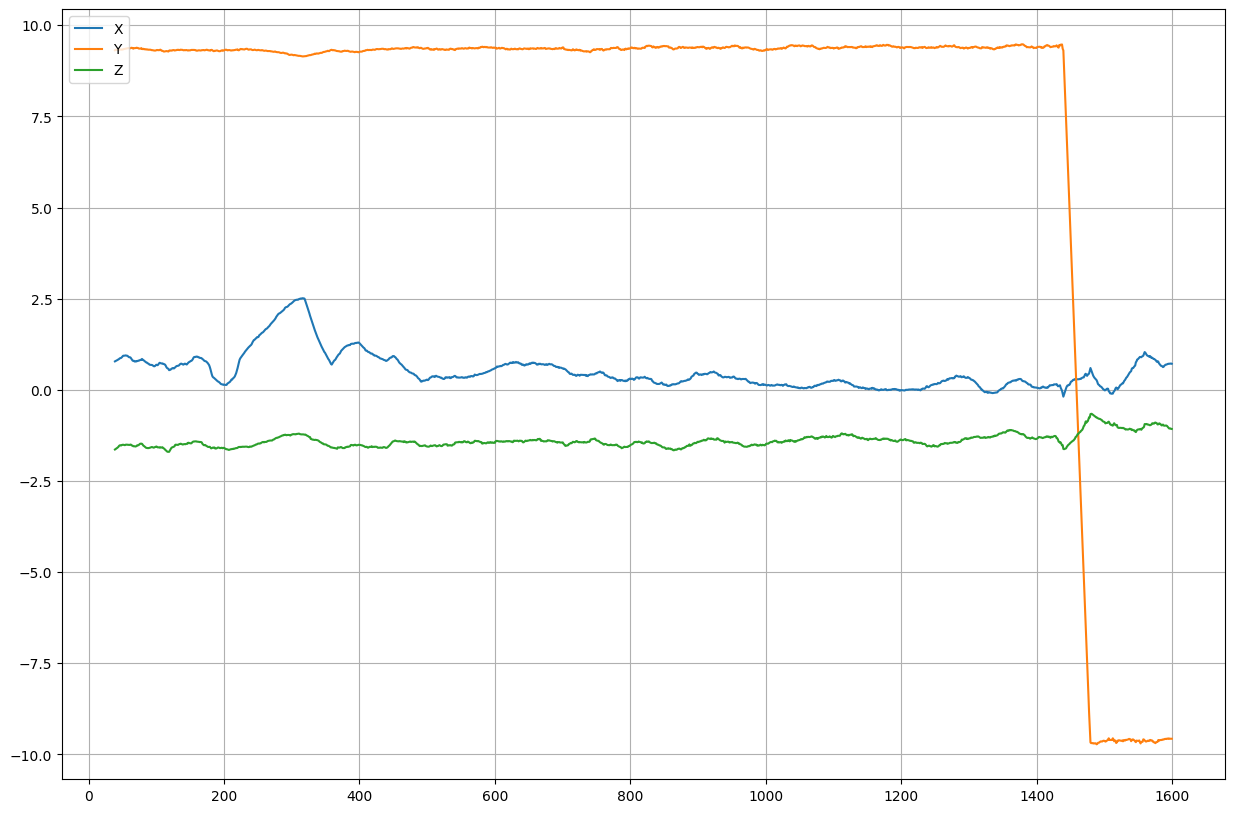

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data['moving_average_X'],label='X')
plt.plot(data['moving_average_Y'],label='Y')
plt.plot(data['moving_average_Z'],label='Z')
plt.legend(loc=2)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(copied_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Clustering

In [ ]:
copied_data['Cluster'] = clusters

In [ ]:
copied_data

deviceId   timestamp  AccX  AccY  AccZ  Cluster
0          109  1691407368  0.78  8.75 -2.03        2
1          109  1691407368  0.78  9.38 -2.19        2
2          109  1691407368  0.62  9.38 -2.34        2
3          109  1691407368  0.62  9.06 -2.03        2
4          109  1691407368  0.47  9.22 -1.88        2
...        ...         ...   ...   ...   ...      ...
1595       109  1691408631  0.94 -9.69 -1.41        0
1596       109  1691408631  1.09 -9.38 -0.94        0
1597       109  1691408631  1.09 -9.84 -0.31        0
1598       109  1691408631  1.09 -9.69 -1.25        0
1599       109  1691408631  0.47 -9.53 -1.09        0

[1600 rows x 6 columns]

In [ ]:
cluster_features_mean = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').mean()
cluster_features_mean

AccX      AccY      AccZ
Cluster                              
0        0.235236  5.164431 -1.280625
1        0.456083  9.360167 -1.478854
2        1.096400  9.291250 -1.502125

In [ ]:
cluster_features_median = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').median()
cluster_features_median

AccX  AccY  AccZ
Cluster                  
0        0.16  9.22 -1.25
1        0.47  9.38 -1.41
2        1.09  9.38 -1.56

In [ ]:
cluster_features_std = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').std()
cluster_features_std

AccX      AccY      AccZ
Cluster                              
0        0.556630  7.922422  0.483491
1        0.418914  0.303324  0.347071
2        0.769076  0.190380  0.305530

In [ ]:
cluster_features_var = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').var()
cluster_features_var

AccX       AccY      AccZ
Cluster                               
0        0.309837  62.764771  0.233764
1        0.175489   0.092005  0.120458
2        0.591478   0.036245  0.093349

In [ ]:
from scipy.stats import kurtosis

In [ ]:
cluster_features_kurt = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').apply(lambda x:kurtosis(x, axis=0))
cluster_features_kurt

<ipython-input-68-e5933b272d60>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  cluster_features_kurt = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').apply(lambda x:kurtosis(x, axis=0))


Cluster
0    [6.0481686856677435, -0.2051814759662247, 7.15...
1    [-0.3009764729126636, 0.47876843548603665, 2.7...
2    [1.0333404395129344, 1.6619989092107943, 2.657...
dtype: object

In [ ]:
cluster_features_min = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').min()
cluster_features_min

AccX   AccY  AccZ
Cluster                   
0       -3.28 -12.34 -5.00
1       -0.94   8.44 -2.66
2       -1.88   8.59 -2.97

In [ ]:
cluster_features_max = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').max()
cluster_features_max

AccX   AccY  AccZ
Cluster                   
0        2.50  11.88  0.47
1        1.72  10.31  0.16
2        2.81  10.16 -0.16

In [ ]:
cluster_features_quantile = copied_data[['AccX', 'AccY', 'AccZ', 'Cluster']].groupby('Cluster').quantile([0.25, 0.50, 0.75])
cluster_features_quantile

AccX  AccY  AccZ
Cluster                       
0       0.25  0.00  8.75 -1.56
        0.50  0.16  9.22 -1.25
        0.75  0.47  9.53 -0.94
1       0.25  0.16  9.22 -1.72
        0.50  0.47  9.38 -1.41
        0.75  0.78  9.53 -1.25
2       0.25  0.62  9.22 -1.72
        0.50  1.09  9.38 -1.56
        0.75  1.41  9.38 -1.25

### Group features extraction

In [28]:
d1 = copied_data[:35000]

In [29]:
d1

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
34995       109  1691439746  3.59  8.91 -1.72
34996       109  1691439746  3.12  9.06 -1.56
34997       109  1691439746  3.28  8.75 -2.03
34998       109  1691439746  3.28  9.06 -2.03
34999       109  1691439746  2.34  8.91 -1.56

[35000 rows x 5 columns]

In [30]:
feature1 = feature_extraction(d1,
                              step_length,
                              window_length)

100%|██████████| 440/440 [00:12<00:00, 35.47it/s]


In [31]:
feature1.to_csv('feature1.csv')

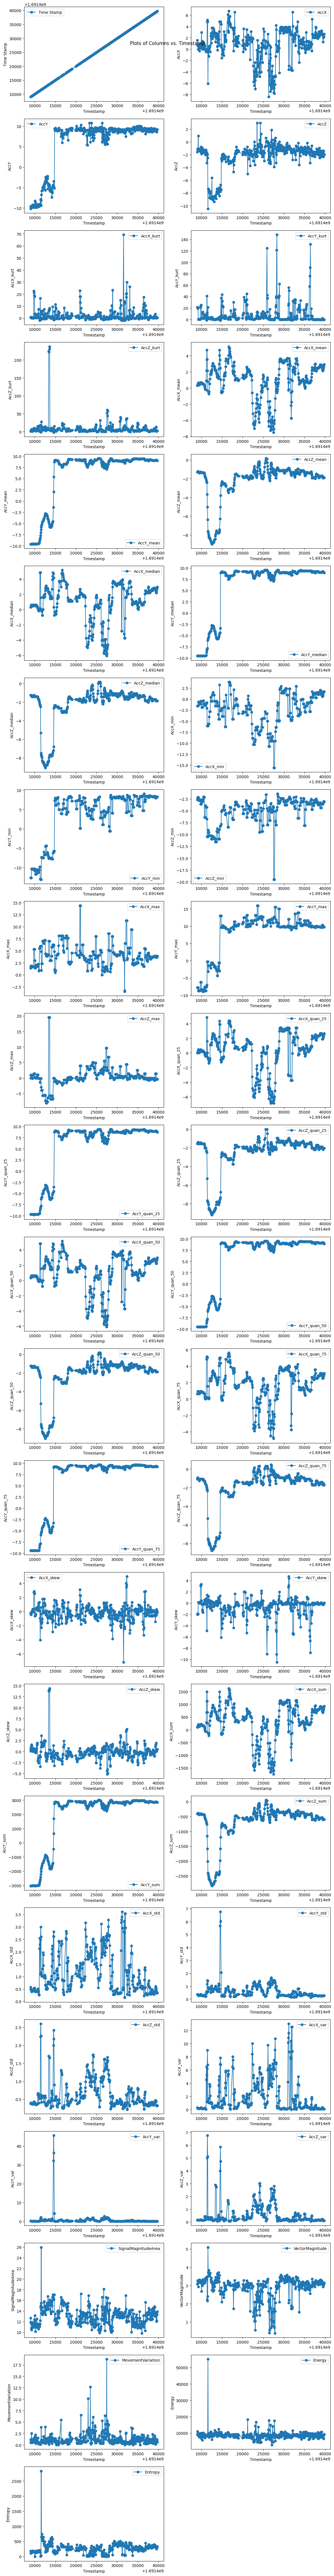

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame (replace 'your_data.csv' with your file's path)
data = pd.read_csv('feature1.csv')

# Extract timestamp and column names (excluding 'Time Stamp')
timestamp = data['Time Stamp']
column_names = data.columns[1:]  # Exclude the 'Time Stamp' column

# Create subplots for each column
num_columns = len(column_names)
num_rows = (num_columns - 1) // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.suptitle('Plots of Columns vs. Timestamp')

for idx, column_name in enumerate(column_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    ax.plot(timestamp, data[column_name], marker='o', linestyle='-', label=column_name)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(column_name)
    ax.legend()

# Remove any empty subplots
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


In [42]:
Group1 = feature1.iloc[:, 0:45]
temp_group = pd.DataFrame(Group1)
temp_group

Time Stamp  AccX   AccY  AccZ  AccX_kurt  AccY_kurt  AccZ_kurt  \
0    1691408993  1.56  -9.53 -1.56   0.369773  21.096188   0.570473   
1    1691409053  0.62 -10.16 -1.09   0.695596  21.320785   2.537606   
2    1691409113  0.62  -9.84 -1.25   0.859470  19.535112   3.699987   
3    1691409173  0.00  -9.53 -1.25   0.917598  20.412255   4.893429   
4    1691409233  0.00  -9.53  0.94   0.171934   0.188021   6.436319   
..          ...   ...    ...   ...        ...        ...        ...   
435  1691439506  1.25   9.06 -1.72   0.828269  -0.041249   1.737068   
436  1691439566  2.03   9.22 -2.34   0.108408  -0.235645   1.324605   
437  1691439626  2.19   8.59 -1.41   0.066434  -0.386495   1.436205   
438  1691439686  2.19   9.22 -1.88   0.210421  -0.538125   1.885378   
439  1691439746  2.66   9.22 -2.03   0.462962  -0.306617   2.761384   

     AccX_mean  AccY_mean  AccZ_mean  ...  AccY_std  AccZ_std  AccX_var  \
0     0.319525  -9.585791  -1.305000  ...  0.352002  0.382951  0.328320   
1     0.317627  -9.596772  -1.249620  ...  0.350179  0.397828  0.238878   
2     0.500000  -9.604082  -1.224747  ...  0.356546  0.397654  0.249321   
3     0.570601  -9.600538  -1.202405  ...  0.352207  0.402285  0.217274   
4     0.659937  -9.583133  -1.241551  ...  0.268228  0.385599  0.154882   
..         ...        ...        ...  ...       ...       ...       ...   
435   2.225949   9.141297  -1.915981  ...  0.253607  0.320728  0.163374   
436   2.462152   9.096044  -1.871867  ...  0.271488  0.327025  0.111039   
437   2.589494   9.072753  -1.850190  ...  0.277458  0.325422  0.122940   
438   2.786804   9.017722  -1.868861  ...  0.281792  0.329321  0.115513   
439   2.937880   8.978070  -1.901392  ...  0.267671  0.325531  0.117494   

     AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.123906  0.146652                12.65         3.087070   
1    0.122625  0.158267                11.87         3.260368   
2    0.127125  0.158129                11.71         3.235738   
3    0.124050  0.161833                10.78         3.283291   
4    0.071946  0.148687                10.47         2.930870   
..        ...       ...                  ...              ...   
435  0.064317  0.102867                12.03         2.930870   
436  0.073706  0.106945                13.59         2.984962   
437  0.076983  0.105900                12.19         3.061046   
438  0.079407  0.108452                13.29         3.087070   
439  0.071648  0.105970                13.91         3.138471   

     MovementVariation        Energy     Entropy  
0                 0.47   9156.212482  110.024212  
1                 1.09  10982.641764  185.006293  
2                 1.24   9756.006756  170.012032  
3                 0.93   8534.692596  185.678076  
4                 2.51   8409.715320  117.188410  
..                 ...           ...         ...  
435               0.63   7500.339420  244.455560  
436               0.78   8950.087104  282.349262  
437               1.25   6491.895527  281.999855  
438               1.09   8712.150253  307.041151  
439               0.63   9255.382784  333.539190  

[440 rows x 45 columns]

## Plots for feature extraction of group 1

In [43]:
import plotly.express as px

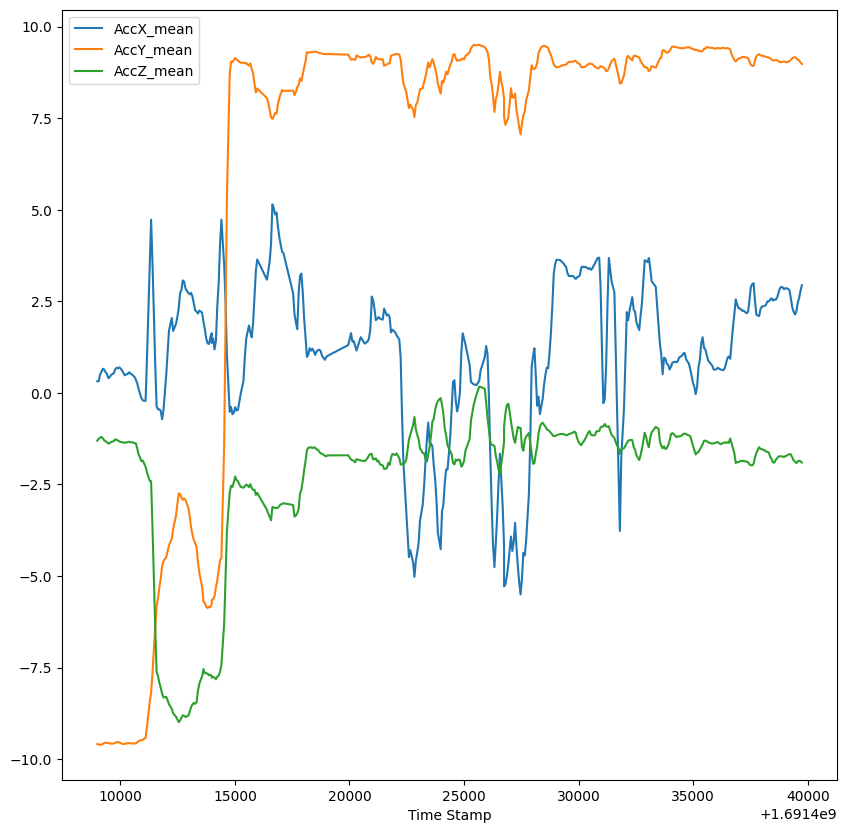

In [44]:
temp_group.plot(x="Time Stamp", y=['AccX_mean', 'AccY_mean', 'AccZ_mean'], kind="line", figsize=(10,10))
plt.show()

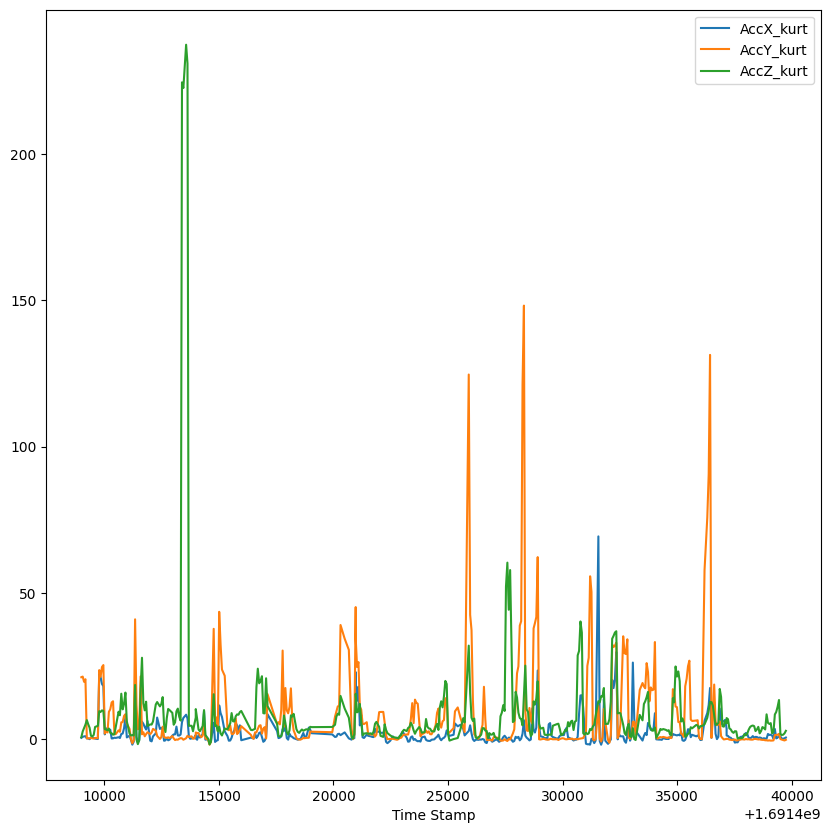

In [51]:
temp_group.plot(x="Time Stamp", y=['AccX_kurt', 'AccY_kurt', 'AccZ_kurt'], kind="line", figsize=(10,10))
plt.show()

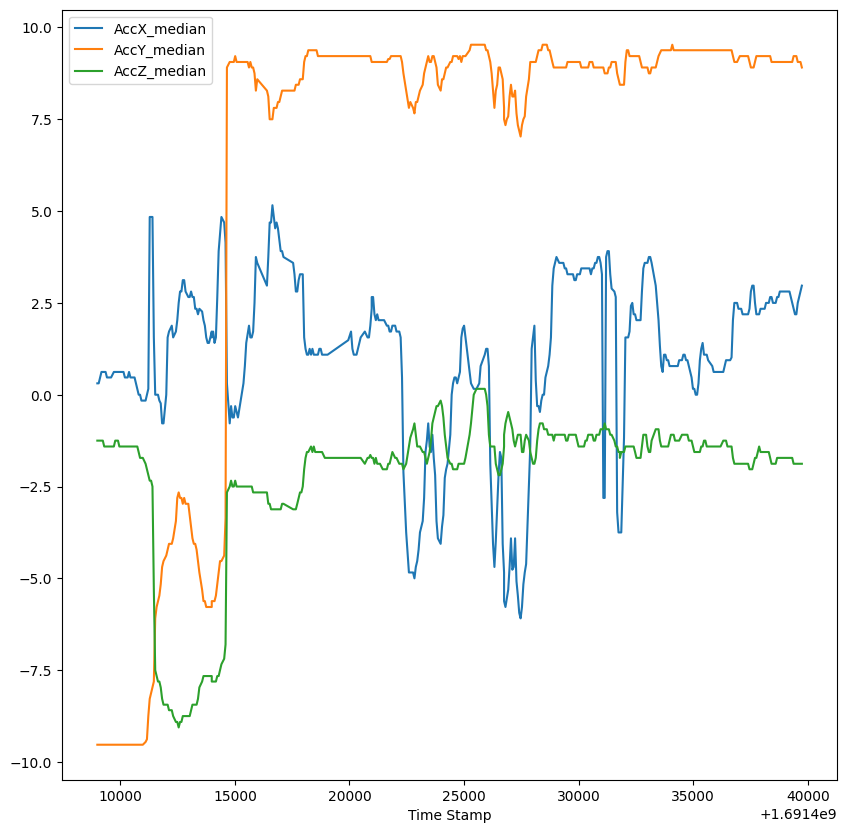

In [52]:
temp_group.plot(x="Time Stamp", y=['AccX_median', 'AccY_median', 'AccZ_median'], kind="line", figsize=(10,10))
plt.show()

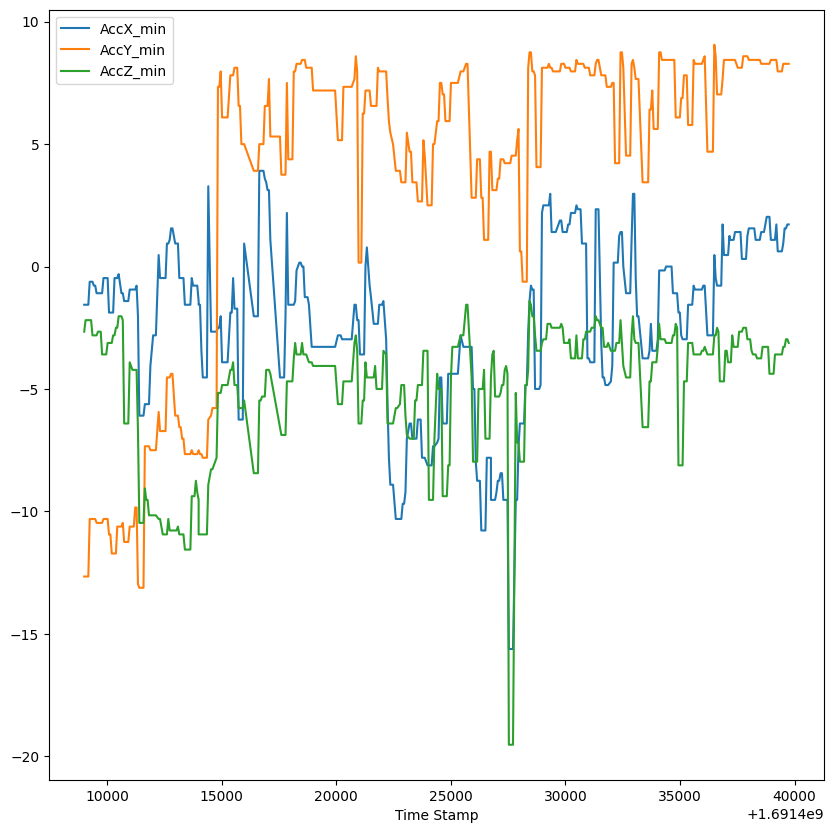

In [53]:
temp_group.plot(x="Time Stamp", y=['AccX_min', 'AccY_min', 'AccZ_min'], kind="line", figsize=(10,10))
plt.show()

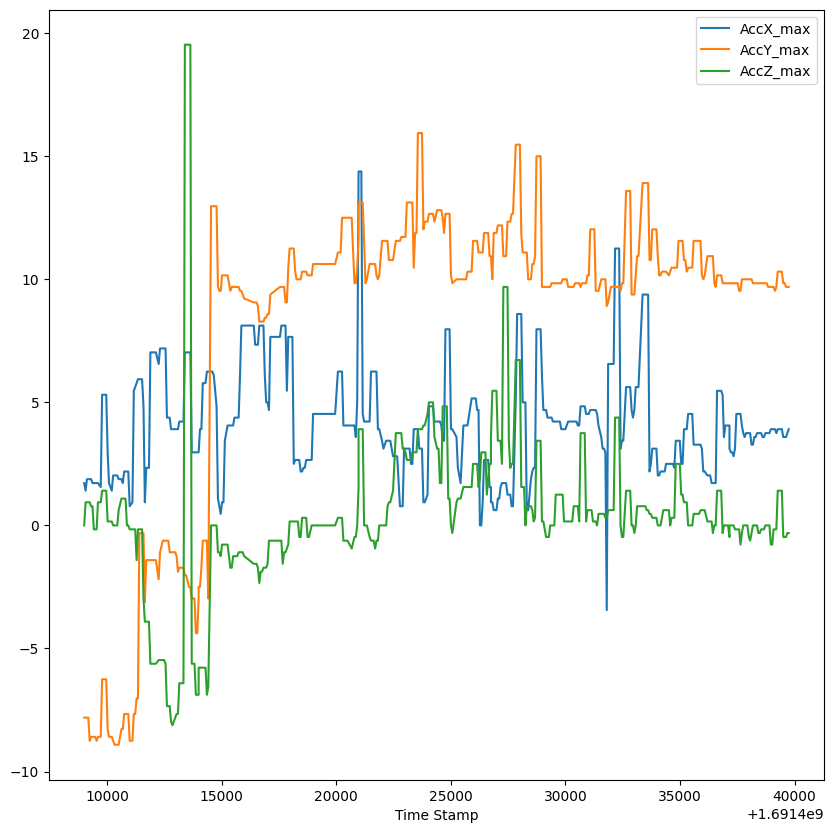

In [54]:
temp_group.plot(x="Time Stamp", y=['AccX_max', 'AccY_max', 'AccZ_max'], kind="line", figsize=(10,10))
plt.show()

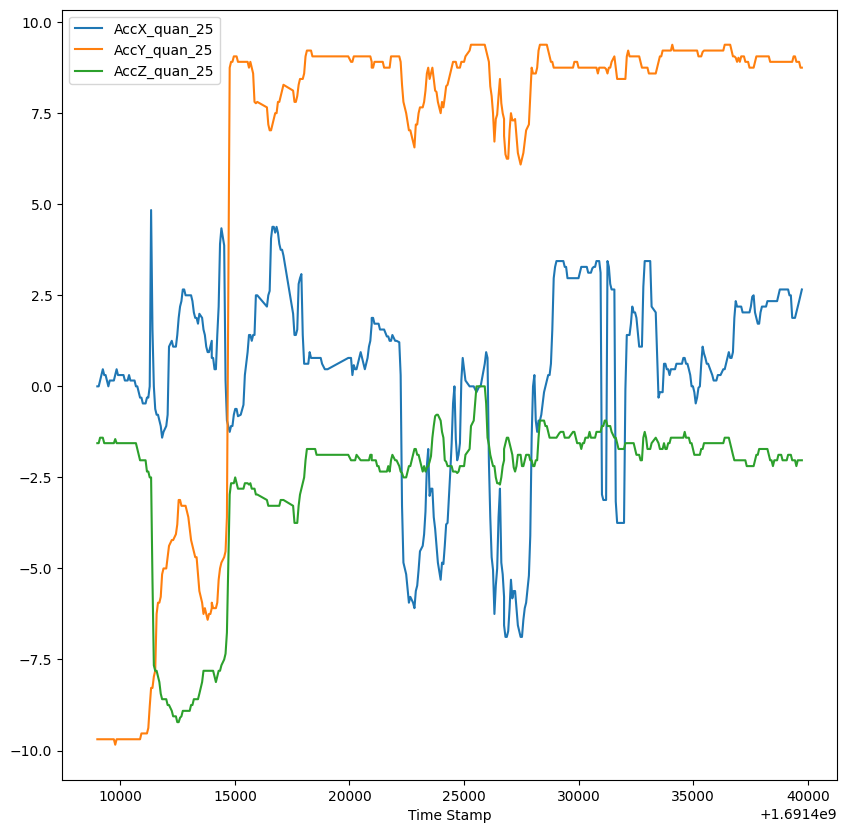

In [56]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_25', 'AccY_quan_25', 'AccZ_quan_25'], kind="line", figsize=(10,10))
plt.show()

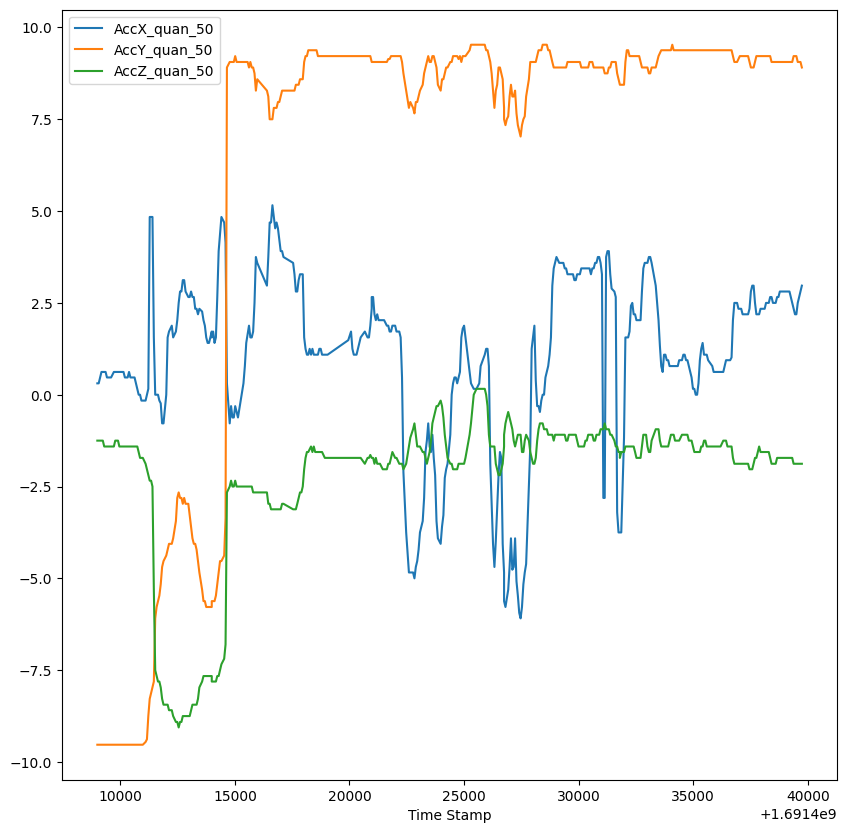

In [57]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50'], kind="line", figsize=(10,10))
plt.show()

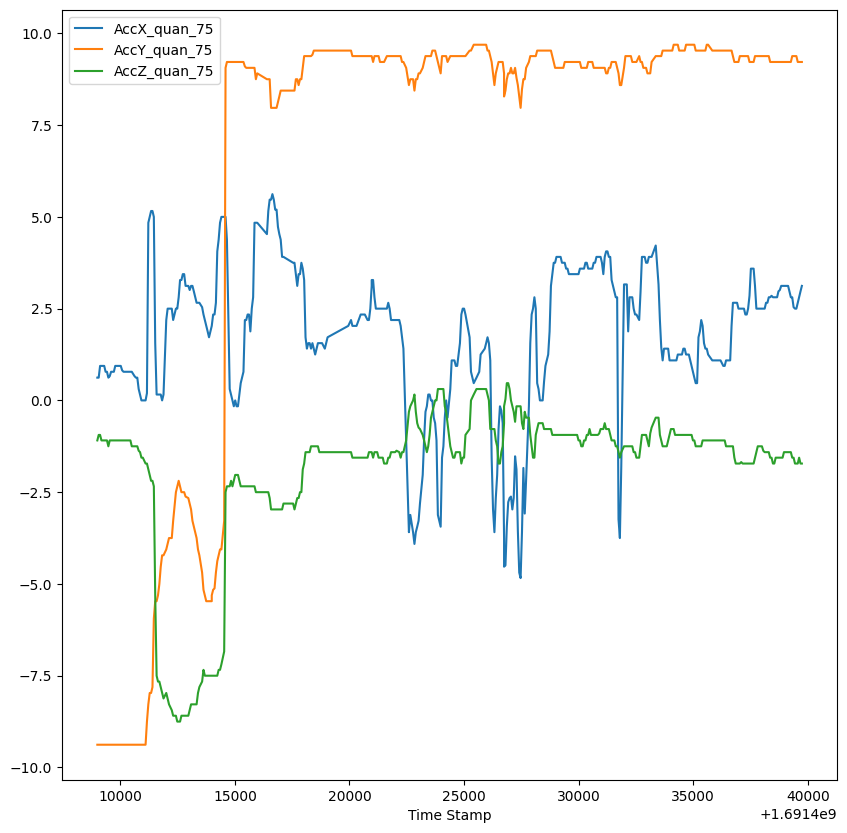

In [58]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_75', 'AccY_quan_75', 'AccZ_quan_75'], kind="line", figsize=(10,10))
plt.show()

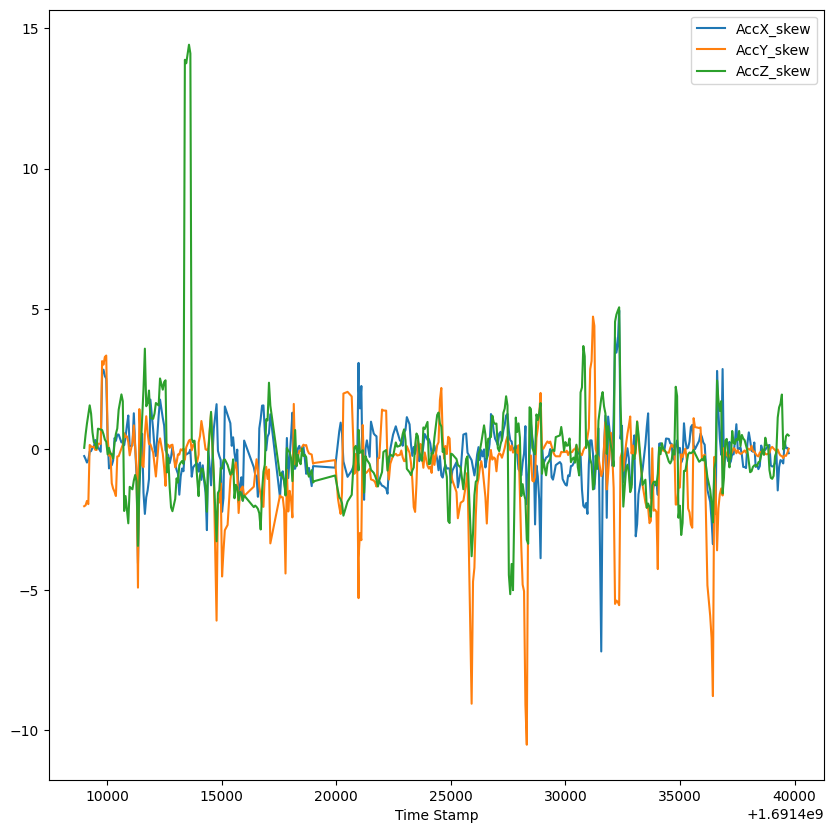

In [59]:
temp_group.plot(x="Time Stamp", y=['AccX_skew', 'AccY_skew', 'AccZ_skew'], kind="line", figsize=(10,10))
plt.show()

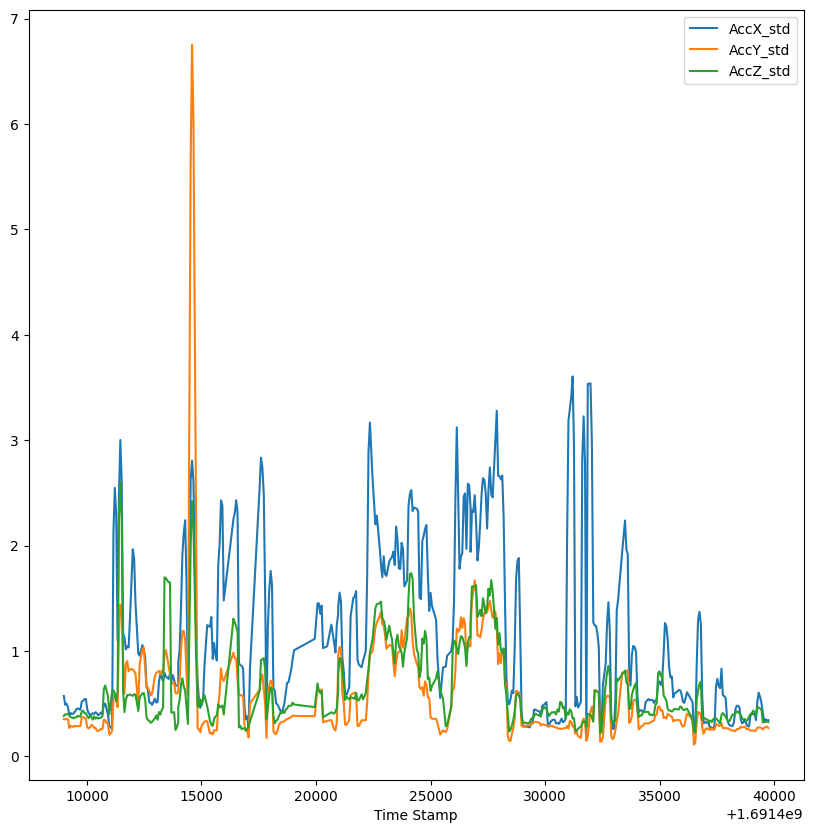

In [60]:
temp_group.plot(x="Time Stamp", y=['AccX_std', 'AccY_std', 'AccZ_std'], kind="line", figsize=(10,10))
plt.show()

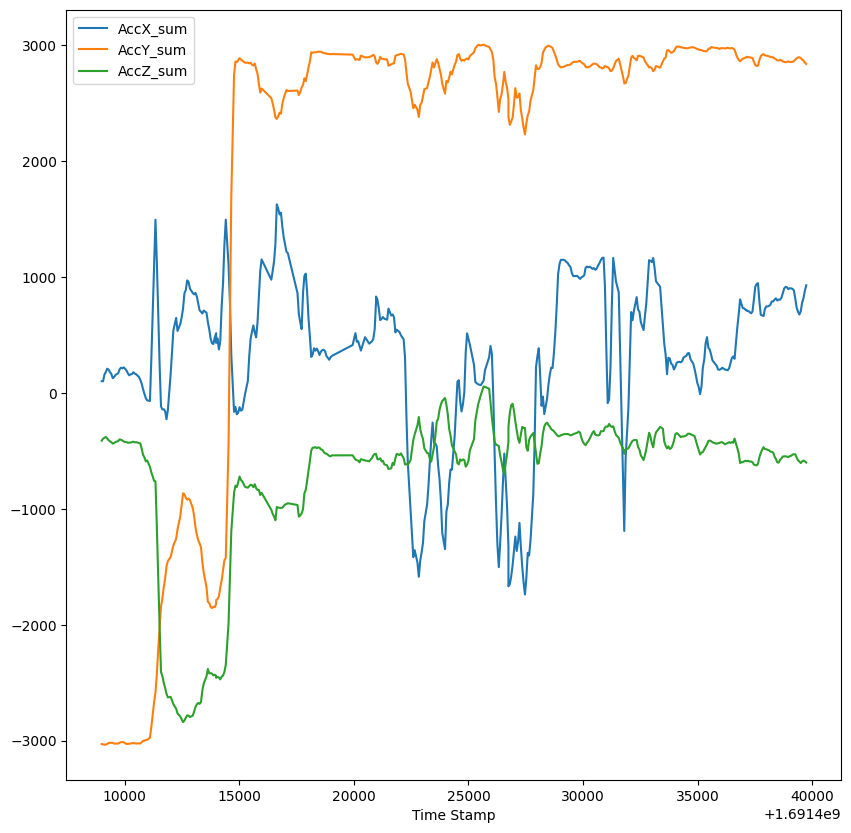

In [61]:
temp_group.plot(x="Time Stamp", y=['AccX_sum', 'AccY_sum', 'AccZ_sum'], kind="line", figsize=(10,10))
plt.show()

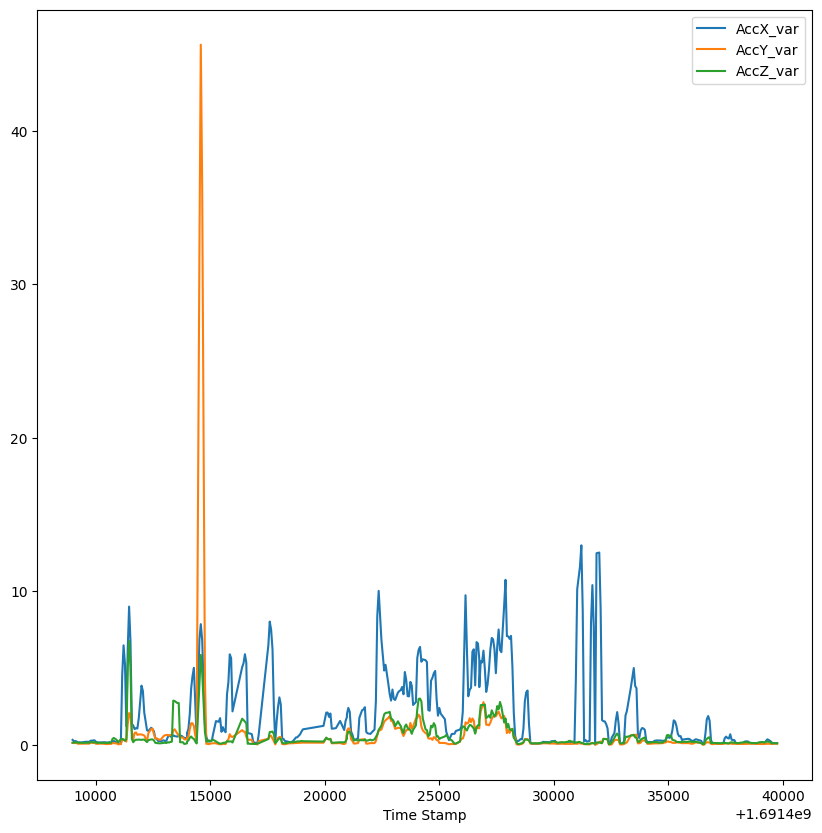

In [62]:
temp_group.plot(x="Time Stamp", y=['AccX_var', 'AccY_var', 'AccZ_var'], kind="line", figsize=(10,10))
plt.show()

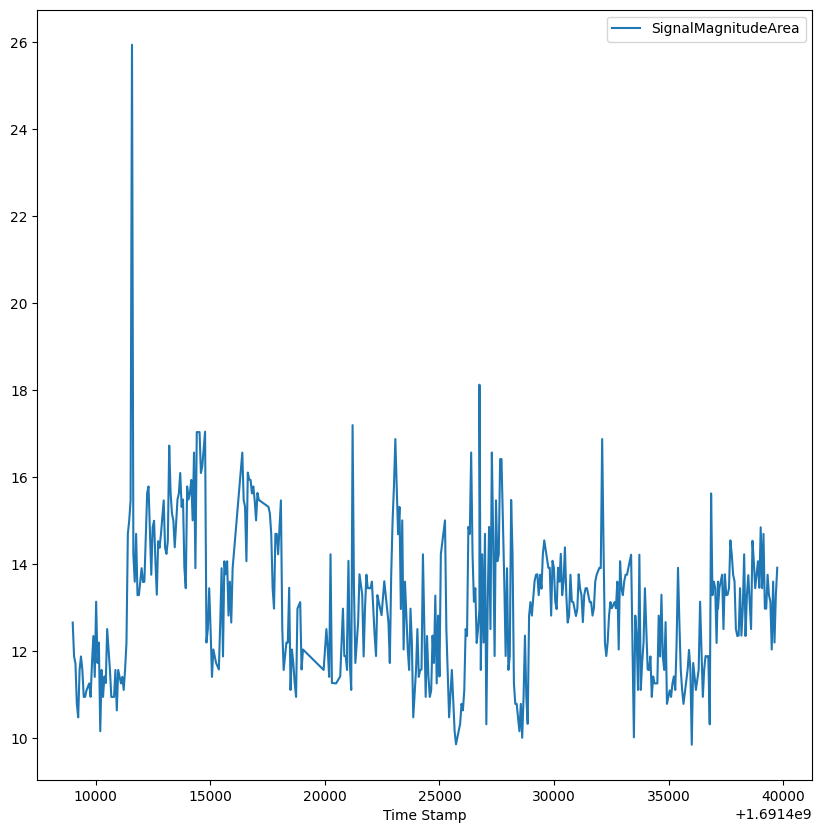

In [65]:
temp_group.plot(x="Time Stamp", y=['SignalMagnitudeArea'], kind="line", figsize=(10,10))
plt.show()

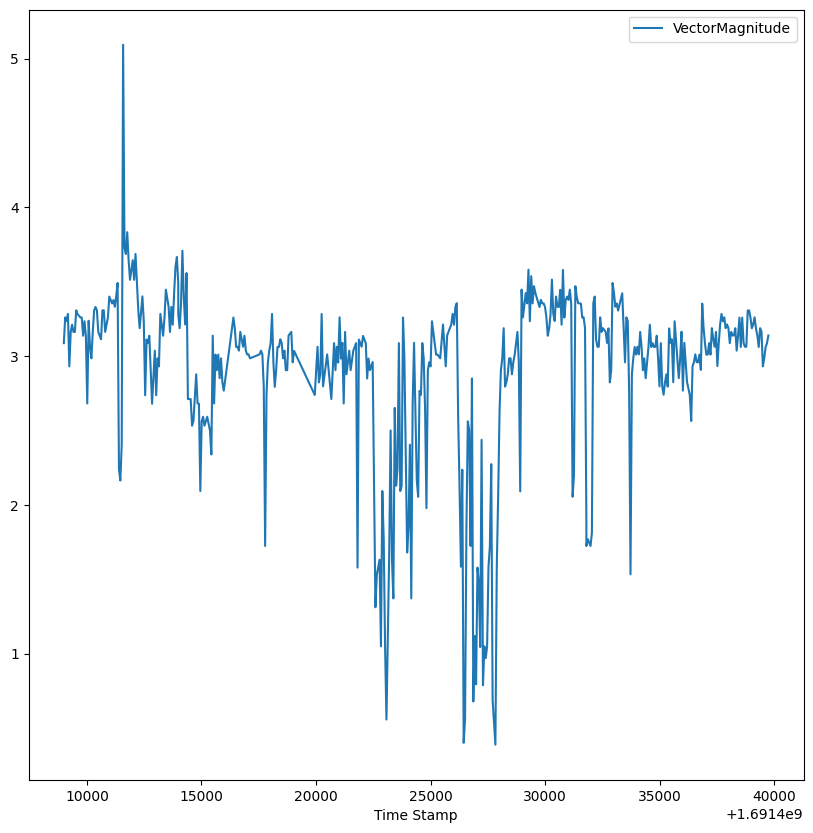

In [66]:
temp_group.plot(x="Time Stamp", y=['VectorMagnitude'], kind="line", figsize=(10,10))
plt.show()

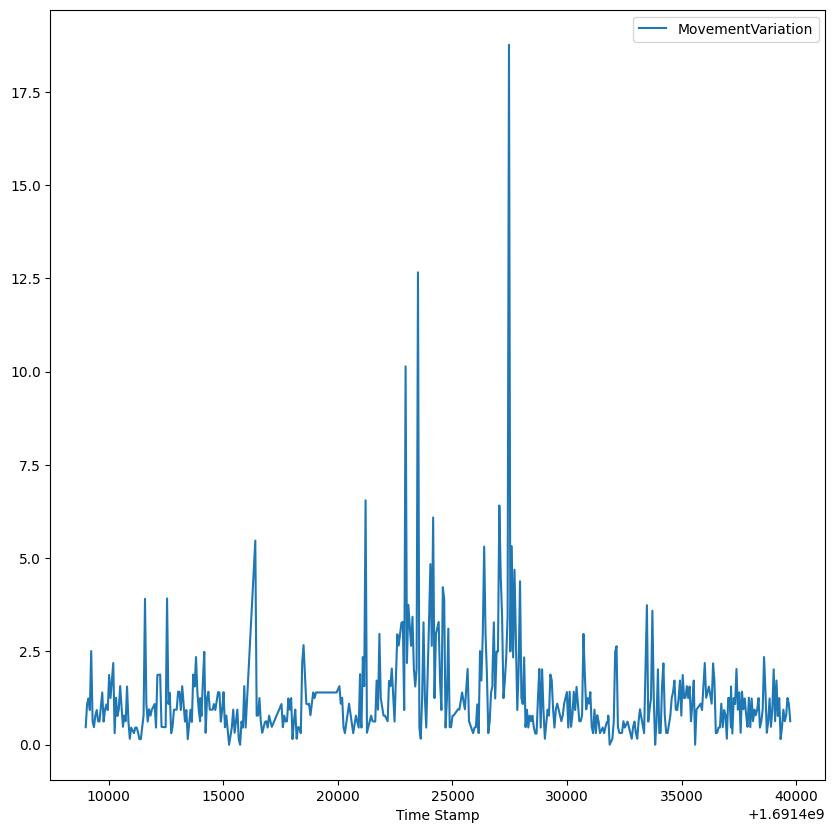

In [67]:
temp_group.plot(x="Time Stamp", y=['MovementVariation'], kind="line", figsize=(10,10))
plt.show()

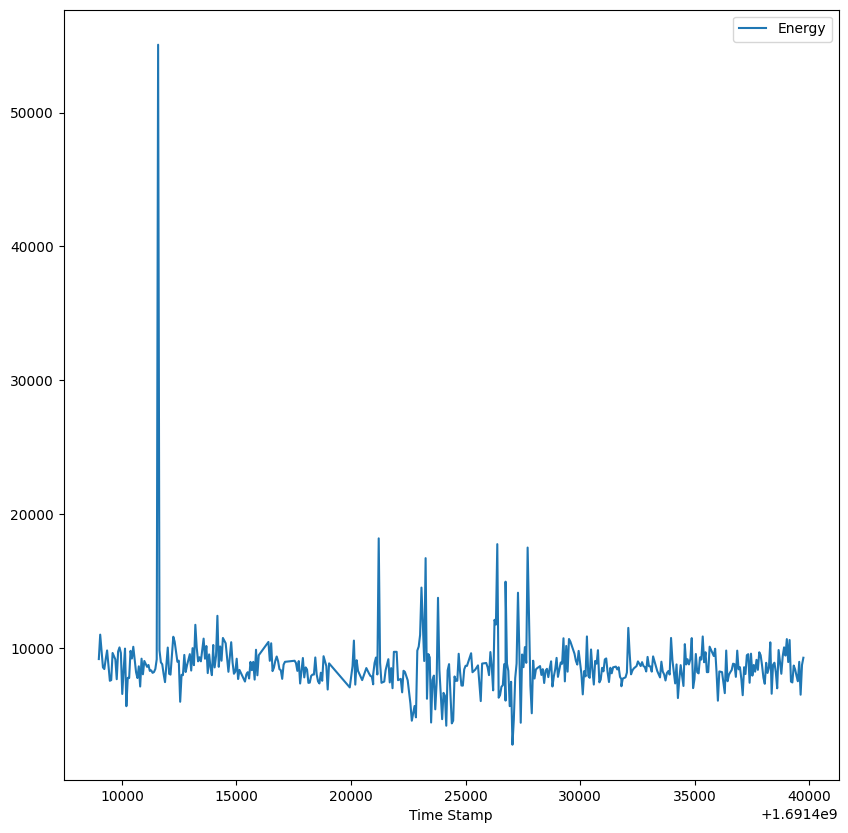

In [68]:
temp_group.plot(x="Time Stamp", y=['Energy'], kind="line", figsize=(10,10))
plt.show()

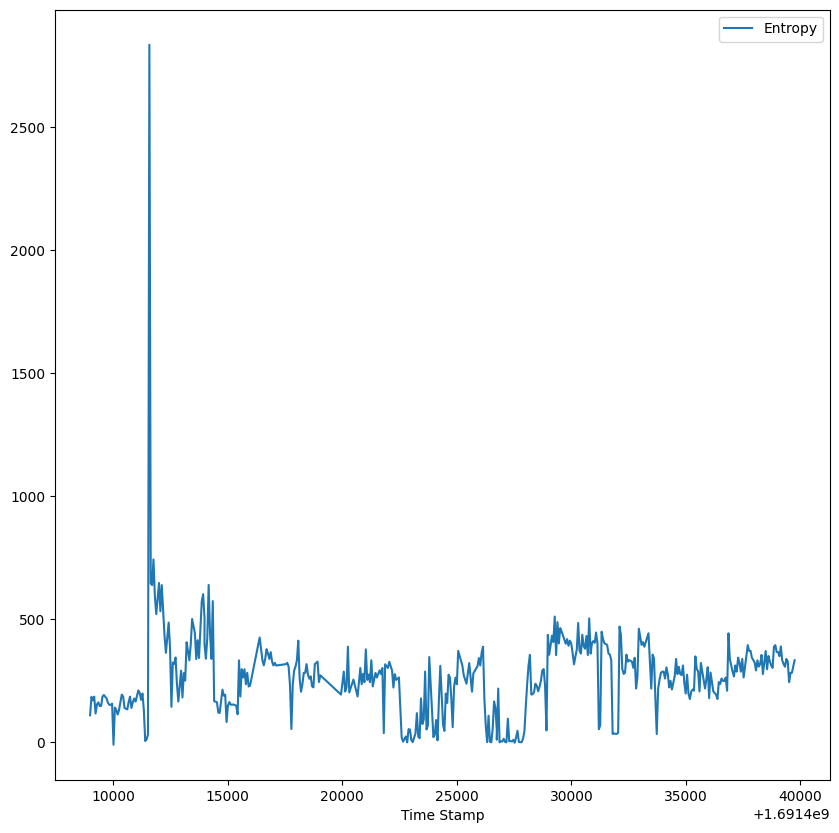

In [69]:
temp_group.plot(x="Time Stamp", y=['Entropy'], kind="line", figsize=(10,10))
plt.show()